<a href="https://www.kaggle.com/code/azharalisoomro/gdp-per-country-2020-to-2025?scriptVersionId=263105740" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📊 GDP by Country (2020–2025)   Tracking Economic Growth


## 📝 Introduction & Dataset Description
This notebook performs Exploratory Data Analysis (EDA) on the [GDP-PER-COUNTRY] DataSet from Kaggle.  
The goal is to clean the data, understand its structure, visualize important patterns,  
and extract insights using only **pandas, numpy, and matplotlib**.  


## 1. Import Libraries & Load the Dataset

* Import required libraries and read the dataset. Also
Handle with Nan and infinity values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

df = pd.read_csv("/kaggle/input/gdp-per-country-20202025/2020-2025.csv")  # load data

print("Before cleaning:")
# count NaN
print("NaN:\n", df.isna().sum())  

# count Inf
print("Inf:\n", df.select_dtypes(include=[np.number]).apply(lambda x: np.isinf(x).sum()))  

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Standardize column names (lowercase, no spaces)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_", regex=True)

# Inf → NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)  

df.fillna(0, inplace=True) 
 # NaN → 0

print("\nAfter cleaning:")
print("NaN:\n", df.isna().sum())  # confirm NaN gone
print("Inf:\n", df.select_dtypes(include=[np.number]).apply(lambda x: np.isinf(x).sum()))  # confirm Inf gone


Before cleaning:
NaN:
 Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64
Inf:
 2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
dtype: int64
Duplicates: 0

After cleaning:
NaN:
 country    0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
dtype: int64
Inf:
 2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
dtype: int64


## 2. GDP per Country Dataset EDA Report
This report provides a comprehensive exploratory data analysis (EDA) of the GDP per Country Recent Dataset. The report was generated using Pandas Profiling, offering insights into the dataset's structure, distributions, correlations, missing values, and more.
                  **📁 File:GDP-Per-Country_Report.html**

In [2]:
df.to_html("Report.html", index=False)  

# install profiling lib
!pip install ydata-profiling  

from ydata_profiling import ProfileReport

# full EDA report
profile = ProfileReport(df, title="GDP Data Report", explorative=True)
profile.to_file("gdp_report.html")  

# styled HTML table with gradient
styled = df.style.background_gradient(cmap="Blues")
styled.to_html("styled_report.html")  


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 41527.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Basic Exploration

Understand dataset shape, unique values, distributions, and descriptive statistics.

In [3]:
# Dataset shape
print("Rows:", df.shape[0], " | Columns:", df.shape[1])

# Column data types
print(df.dtypes)

# Unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Summary statistics
print(df.describe())


Rows: 196  | Columns: 7
country     object
2020         int64
2021       float64
2022       float64
2023       float64
2024       float64
2025       float64
dtype: object
country: 196 unique values
2020: 196 unique values
2021: 195 unique values
2022: 195 unique values
2023: 195 unique values
2024: 193 unique values
2025: 189 unique values
               2020          2021          2022          2023          2024  \
count  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02  1.960000e+02   
mean   4.378886e+05  4.992040e+05  5.201441e+05  5.430191e+05  5.639384e+05   
std    1.942936e+06  2.210030e+06  2.336414e+06  2.441054e+06  2.547967e+06   
min    5.200000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    9.588000e+03  9.467500e+03  1.246550e+04  1.238625e+04  1.204975e+04   
50%    3.533450e+04  3.707800e+04  4.051050e+04  4.321100e+04  4.374850e+04   
75%    2.074810e+05  2.513878e+05  2.629442e+05  2.755445e+05  2.858750e+05   
max    2.135412e+07  2.368

##  4. Univariate Analysis (One Column at a Time)

Look at single-column distributions.

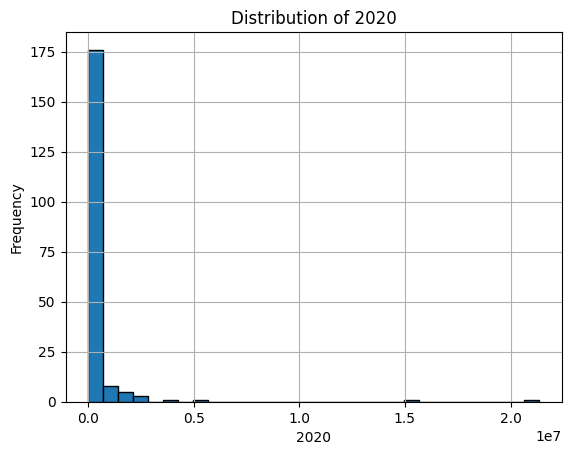

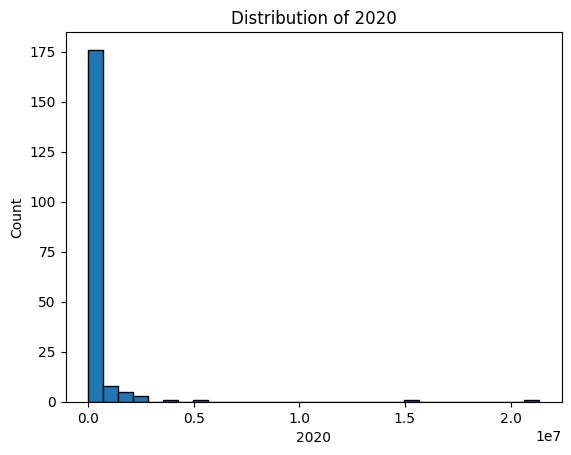

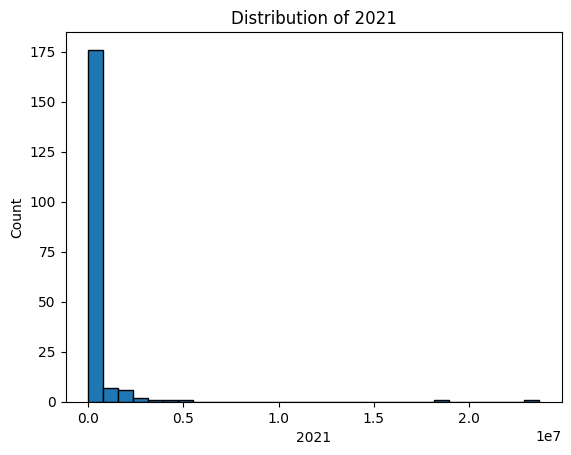

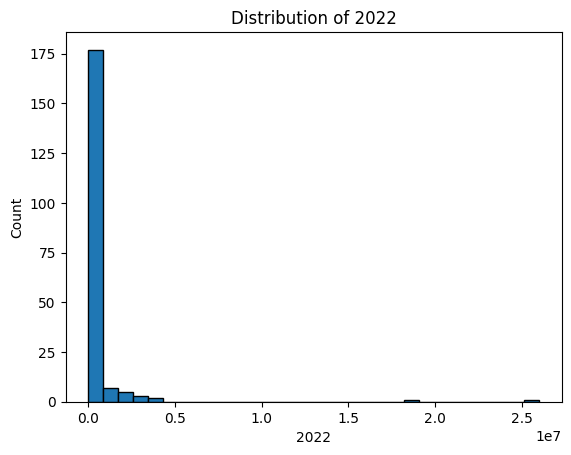

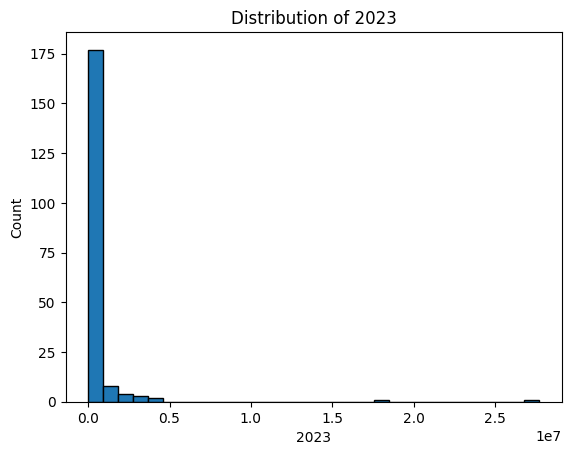

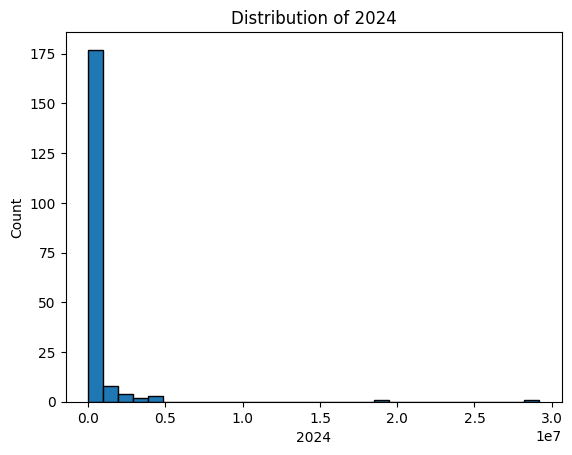

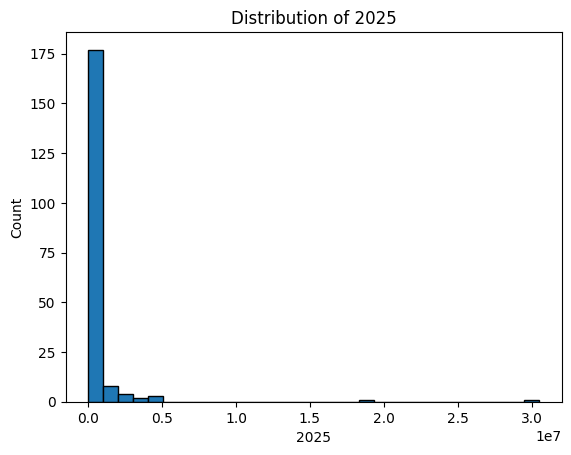

In [4]:
# Pick numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Histogram for first numeric column
df[numeric_cols[0]].hist(bins=30, edgecolor='black')
plt.title(f"Distribution of {numeric_cols[0]}")
plt.xlabel(numeric_cols[0])
plt.ylabel("Frequency")
plt.show()

# Loop over numeric columns for histograms
for col in numeric_cols:
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


## 5. Bivariate Analysis (Relationships Between Columns)

Study how two variables relate to each other.

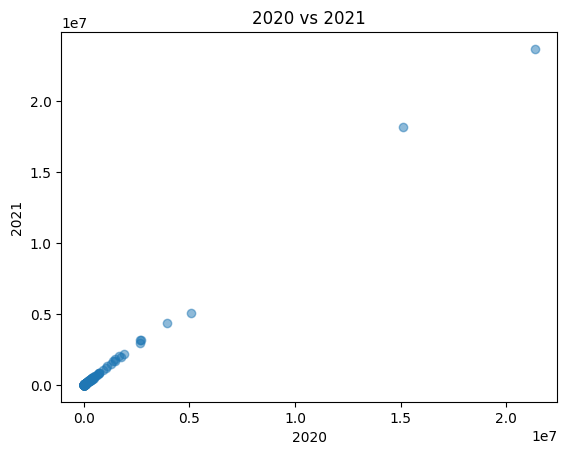

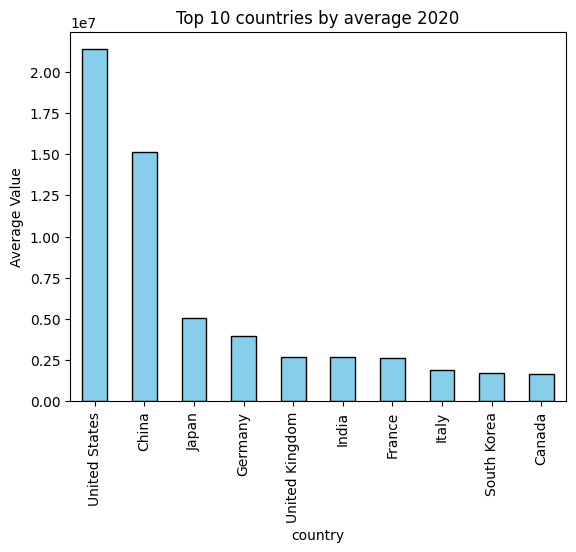

In [5]:
# Scatter plot (numeric vs numeric)
plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], alpha=0.5)
plt.title(f"{numeric_cols[0]} vs {numeric_cols[1]}")
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.show()

# Group by categorical and calculate average
if 'country' in df.columns:
    avg = df.groupby('country')[numeric_cols[0]].mean().sort_values(ascending=False).head(10)
    avg.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 10 countries by average {numeric_cols[0]}")
    plt.ylabel("Average Value")
    plt.show()


## 6. Time-Series or Trend Analysis 
### Reshaping the Dataset (Wide to Long)

Our dataset has years (2020–2025) as separate columns. To make analysis and visualization easier, we convert them into a single column called Year with another column for GDP. This way, the data becomes tidy and ready for time-series analysis.

In [6]:
# Convert wide format into long format
gdp_long = df.melt(id_vars="country", 
                   var_name="Year", 
                   value_name="GDP")

# Convert year to numeric (remove issues with '21', '22' as strings)
gdp_long["Year"] = gdp_long["Year"].astype(int)

print(gdp_long.head(10))


               country  Year        GDP
0          Afghanistan  2020    20136.0
1              Albania  2020    15271.0
2              Algeria  2020   164774.0
3              Andorra  2020     2885.0
4               Angola  2020    66521.0
5  Antigua and Barbuda  2020     1412.0
6            Argentina  2020   385218.0
7              Armenia  2020    12642.0
8                Aruba  2020     2486.0
9            Australia  2020  1362613.0


## 7. PAKISTAN’s GDP from 2020 to 2025

Here we focus only on Pakistan to see how its economy changed year by year. This helps us understand whether the country’s GDP is growing, declining, or staying stable during 2020–2025.

In [7]:
pakistan_gdp_long = pakistan_gdp.melt(id_vars=["country"], 
                                      value_vars=["2020","2021","2022","2023","2024","2025"],
                                      var_name="Year",
                                      value_name="GDP")
print(pakistan_gdp_long)


NameError: name 'pakistan_gdp' is not defined

In [ ]:
pakistan_gdp_long["Year"] = pd.to_numeric(pakistan_gdp_long["Year"])
pakistan_gdp_long["GDP"] = pd.to_numeric(pakistan_gdp_long["GDP"])


In [ ]:
pakistan_gdp_clean = pakistan_gdp_long[(pakistan_gdp_long["Year"] <= 2024) & (pakistan_gdp_long["GDP"] != 0)]
print(pakistan_gdp_clean)


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(pakistan_gdp_clean["Year"], pakistan_gdp_clean["GDP"], marker='o', linestyle='-', color='green')
plt.title("Pakistan's GDP (2020–2024)")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(True)
plt.show()


### Growth Rate by year-over-year and Average rate 

In [ ]:
# Calculate YoY growth rates
pakistan_gdp_clean["GrowthRate"] = pakistan_gdp_clean["GDP"].pct_change() * 100
print(pakistan_gdp_clean)
# Average growth rate per year
avg_growth = pakistan_gdp_clean["GrowthRate"].mean()
print(f"Average Growth Rate (2020–2024): {avg_growth:.2f}%")


### Estimate 2025 GDP


In [ ]:
gdp_2024 = pakistan_gdp_clean[pakistan_gdp_clean["Year"] == 2024]["GDP"].values[0]

# Estimate 2025 GDP
gdp_2025_est = gdp_2024 * (1 + avg_growth/100)
print(f"Estimated GDP for Pakistan in 2025: {gdp_2025_est:.2f} million USD")


## 8. Correlation and Outlier Detection in Top 2 Countries
    

In [ ]:
# Correlation between numeric columns
corr = df[numeric_cols].corr()
print("Correlation Matrix:\n", corr)

# Find outliers (values above mean + 3*std)
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[df[col] > mean + 3*std]
    
    # Print country names of outliers
    if not outliers.empty:
        print(f"\nOutliers in {col}:")
        print(outliers[['country', col]])
    else:
        print(f"\nNo outliers found in {col}")


# 9. Conclusion & Insights

* The dataset contains 196 rows and 7 columns.

* The countries with the highest GDP were the US and China.

* A strong correlation was observed between consecutive years, especially 2020 and 2021.

* Pakistan’s GDP was analyzed, and the 2025 GDP was estimated due to missing data in that year.

* The GDP distribution across countries is right-skewed, indicating a few countries with extremely high    values compared to the rest.